<a href="https://colab.research.google.com/github/marshelino-maged/Value-and-Policy-iteration/blob/main/lab3_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **value iteration**

The value iteration evaluated using this formula:

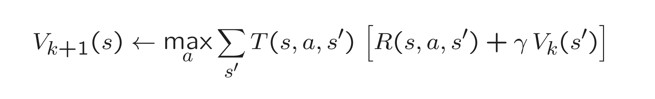


each time we update the new node based on the last dated value.

we will start with vector v = [[0,0,0],[0,0,0],[0,0,0]]

because we always know that in the last level all values will converge to 0


**But how we know that it will always lead to convergence?**

1- if the tree has a max length "max iterations" then it will converge

2- if it hasn't then we every iteration multiply by discount factor 0.99 which is less than 1 so after k number of iterations 0.99^k will lead to 0 that mean that it will always converge

it is O(S^2 * T) where S is the number of the states and T is the number of the actions in each state.

In [ ]:
def valueIteration(req,gamma,v,R):
  diff=1
  while req < diff:
        diff = 0
        for i in range(3):
            for j in range(3):
                if (i == 0 and j == 2) or (i == 0 and j == 0):
                    v1 = 0
                else:
                    v1 = 0.8 * v[max(0, i - 1)][j] + 0.1 * v[i][max(0, j - 1)] + 0.1 * v[i][min(2, j + 1)]  # UP
                    v1 = max(v1, 0.8 * v[min(2, i + 1)][j] + 0.1 * v[i][max(0, j - 1)] + 0.1 * v[i][min(2, j + 1)])  # DOWN
                    v1 = max(v1, 0.8 * v[i][max(0, j - 1)] + 0.1 * v[max(0, i - 1)][j] + 0.1 * v[min(2, i + 1)][j])  # LEFT
                    v1 = max(v1, 0.8 * v[i][min(2, j + 1)] + 0.1 * v[max(0, i - 1)][j] + 0.1 * v[min(2, i + 1)][j])  # RIGHT

                v1 = R[i][j] + gamma * v1
                diff = max(diff, abs(v[i][j] - v1))
                v[i][j] = v1
        # print(v[0])
        # print(v[1])
        # print(v[2])
        # print("-----------")
  return v

To extract policies we should have the final expected values.

then we will use this formula:

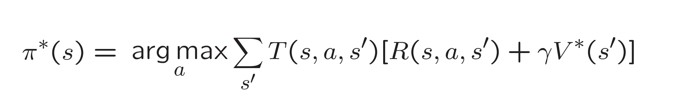

it is for each node calculate all expected values for each action choosen then choose the action that will maximize its expected value.


In [ ]:
def extractPoilcy(v):
    policy=[['G', '', 'G'], ['', '', ''], ['', '', '']]
    for i in range(3):
        for j in range(3):
            if (i == 0 and j == 2) or (i == 0 and j == 0):
                continue

            action = 'U'
            profit = 0.8 * v[max(0, i - 1)][j] + 0.1 * v[i][max(0, j - 1)] + 0.1 * v[i][min(2, j + 1)]

            if 0.8 * v[min(2, i + 1)][j] + 0.1 * v[i][max(0, j - 1)] + 0.1 * v[i][min(2, j + 1)] > profit:
                action = 'D'
                profit = 0.8 * v[min(2, i + 1)][j] + 0.1 * v[i][max(0, j - 1)] + 0.1 * v[i][min(2, j + 1)]

            if 0.8 * v[i][max(0, j - 1)] + 0.1 * v[max(0, i - 1)][j] + 0.1 * v[min(2, i + 1)][j] > profit:
                action = 'L'
                profit = 0.8 * v[i][max(0, j - 1)] + 0.1 * v[max(0, i - 1)][j] + 0.1 * v[min(2, i + 1)][j]

            if 0.8 * v[i][min(2, j + 1)] + 0.1 * v[max(0, i - 1)][j] + 0.1 * v[min(2, i + 1)][j] > profit:
                action = 'R'
                profit = 0.8 * v[i][min(2, j + 1)] + 0.1 * v[max(0, i - 1)][j] + 0.1 * v[min(2, i + 1)][j]

            policy[i][j] = action

    return policy


when r = 100



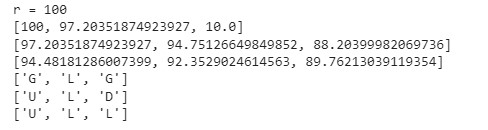




All the nodes choose not to exit the game at the exit node with value 10 because the value in the node r is much greater ... so they try to avoid the node with value 10 as much as possible

as in the node (2,3) ... it will choose to go down so that it will not be a chance to exit at value 10.

when r = 3

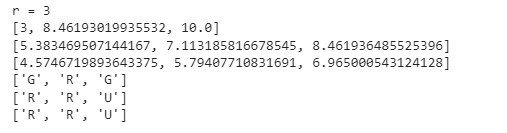



as the node with value 10 now has more points than the node r.

all the nodes will try to get to the node with value 10 ... using the most shorter path.

when r = 0

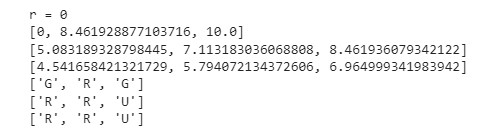



as the node with value 10 now has more points than the node r.

all the nodes will try to get to the node with value 10 ... using the most shorter path.

when r = -3

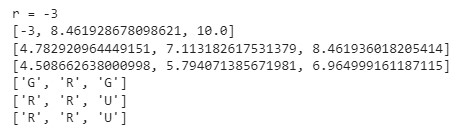



as the node with value 10 now has more points than the node r.

all the nodes will try to get to the node with value 10 ... using the most shorter path.

In [ ]:
r = int(input("r = "))
gamma = .99  # discount factor
R = [[r, -1, 10], [-1, -1, -1], [-1, -1, -1]]  # Rewards
req = 0.001  # required difference of utilities
diff = 1  # difference of utilities
v = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

v=valueIteration(req,gamma,v,R)
for i in range(3):
    print(v[i])

policy=extractPoilcy(v)

for i in range(3):
    print(policy[i])


# **policy iteration**


### Value iteration is slow O(S^2 * A) per iteration.

### the max at each state rarely changes

### so the policy often converges long before the values.

### policy iteration has two main steps.

Step1: Policy evaluation:
calculate utilities for some fixed policy

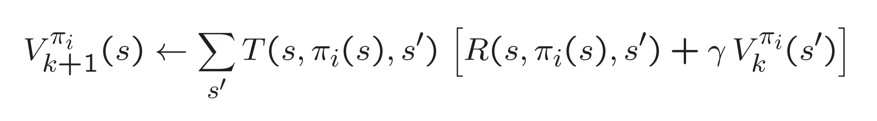




Step2: Policy improvement:
update policy using one step look ahead with resulting converged utilities as future values


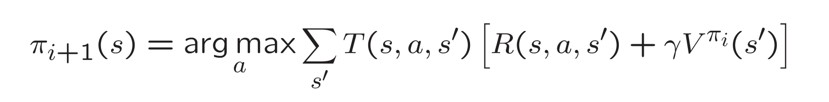



repeat steps until policy converges

In [50]:
def policyEvaluation(req,gamma,R,policy):
  v = [[0,0,0],[0,0,0],[0,0,0]]
  # v_temp = v
  diff=1
  while req < diff:
        diff = 0
        for i in range(3):
            for j in range(3):
                if (i == 0 and j == 2) or (i == 0 and j == 0):
                    v1 = 0
                else:
                    if(policy[i][j]=="U"):
                      v1 = 0.8 * v[max(0, i - 1)][j] + 0.1 * v[i][max(0, j - 1)] + 0.1 * v[i][min(2, j + 1)]  # UP
                    elif(policy[i][j]=="D"):
                      v1 = 0.8 * v[min(2, i + 1)][j] + 0.1 * v[i][max(0, j - 1)] + 0.1 * v[i][min(2, j + 1)]  # DOWN
                    elif(policy[i][j]=="L"):
                      v1 = 0.8 * v[i][max(0, j - 1)] + 0.1 * v[max(0, i - 1)][j] + 0.1 * v[min(2, i + 1)][j]  # LEFT
                    elif(policy[i][j]=="R"):
                      v1 = 0.8 * v[i][min(2, j + 1)] + 0.1 * v[max(0, i - 1)][j] + 0.1 * v[min(2, i + 1)][j]  # RIGHT


                v1 = R[i][j] + gamma * v1
                diff = max(diff, abs(v[i][j] - v1))
                v[i][j] = v1
        # v = v_temp
        # print(v_temp[0])
        # print(v_temp[1])
        # print(v_temp[2])
        # print("-----------")
  return v

In [ ]:
r =  int(input("r = "))
gamma = .99  # discount factor
R = [[r, -1, 10], [-1, -1, -1], [-1, -1, -1]]  # Rewards
policy = [['Null', 'L', 'Null'], ['L', 'L', 'U'], ['U', 'R', 'U']]  # initial Policy "Random"
req = 0.001  # required difference of utilities
diff = 1  # difference of utilities

while True:
    # print("start")
    v=policyEvaluation(req,gamma,R,policy)
    newPolicy=extractPoilcy(v)
    if newPolicy==policy: break
    else : policy=newPolicy

for i in range(3):
    print(policy[i])

# Assumptions

we assume that if a node go down, up, left or right ... and there is no node to go to ... then it will not move and will get the reward value of itself as its try to make a move and failed.

we assume that if we reach the node r or 10 ... then we cannot go back to the game and make a move ... we only will have the move to exit the game with the node reward.